### Data review of the AirFRANS dataset

This notebook aims to summarize information about the AirFRANS dataset and simply explain what it consists of.

You can find the airfrans documentation on: https://airfrans.readthedocs.io/en/latest/notes/simulation.html

### Imports

The most important package to use here is "airfrans". There is no specified version, so "pip install airfrans" is sufficient. This package is used to load and work with the dataset.

In [22]:
import os
import airfrans as af
import matplotlib.pyplot as plt

import numpy as np

### Downloading the dataset

It is recommended to download the data directly to your local machine by executing the following cell:

In [ ]:
'''
directory_name='insert_directory_name_here'
if not os.path.isdir(directory_name):
   af.dataset.download(root = ".", file_name = directory_name, unzip = True, OpenFOAM = False)
'''

In [5]:
# If you already have the data downloaded, just specify the directory name:
directory_name = 'Dataset/Dataset' # depends on where you have the data stored

### Loading the data

As mentioned above, the data is loaded using the AirFRANS package, instead of pandas.

In [6]:
dataset_list, dataset_name = af.dataset.load(root = directory_name, task = 'scarce', train = True)

Loading dataset (task: scarce, split: train): 100%|██████████| 200/200 [01:47<00:00,  1.85it/s]


Let us look at dataset_list and dataset_name:

dataset_name contains the data instances' (simulations') names, and dataset_list contains the data itself. The latter is not very readable on its own.

In [7]:
dataset_list


[array([[ 4.21555805e+00,  6.31121755e-01,  3.59096884e+01, ...,
          2.85990310e+00,  5.03044717e-10,  0.00000000e+00],
        [ 4.21557093e+00,  6.31108701e-01,  3.59096884e+01, ...,
          2.86004496e+00,  5.04038977e-10,  0.00000000e+00],
        [ 3.99052548e+00,  5.86954355e-01,  3.59096884e+01, ...,
          3.25235939e+00,  3.09837572e-10,  0.00000000e+00],
        ...,
        [-2.13092208e+00, -1.53288102e+00,  3.59096884e+01, ...,
          2.22086563e+01,  3.12786264e-09,  0.00000000e+00],
        [-2.14492369e+00, -1.52218294e+00,  3.59096884e+01, ...,
          2.19026947e+01,  3.12771764e-09,  0.00000000e+00],
        [-2.15894747e+00, -1.51117182e+00,  3.59096884e+01, ...,
          2.15941086e+01,  3.12757775e-09,  0.00000000e+00]]),
 array([[ 4.21687031e+00, -1.99915648e-01,  5.87172837e+01, ...,
          2.49190092e+00,  7.00889854e-03,  0.00000000e+00],
        [ 4.21688938e+00, -1.99935317e-01,  5.87172837e+01, ...,
          2.49188542e+00,  7.00904103e

In [8]:
dataset_name

['airFoil2D_SST_36.622_11.319_3.941_5.424_1.0_16.283',
 'airFoil2D_SST_58.831_-3.563_2.815_4.916_10.078',
 'airFoil2D_SST_43.327_8.905_4.236_6.511_10.744',
 'airFoil2D_SST_89.151_4.462_0.974_4.094_1.0_19.856',
 'airFoil2D_SST_87.422_2.992_1.895_3.128_1.0_10.656',
 'airFoil2D_SST_42.531_-3.927_1.264_6.838_0.0_7.489',
 'airFoil2D_SST_46.246_9.78_3.769_2.353_17.745',
 'airFoil2D_SST_67.481_-1.259_5.136_2.438_18.882',
 'airFoil2D_SST_45.701_-1.925_0.671_7.455_0.0_12.285',
 'airFoil2D_SST_85.488_6.826_3.112_3.445_1.0_17.471',
 'airFoil2D_SST_56.177_2.108_1.208_3.592_0.0_14.763',
 'airFoil2D_SST_46.0_-0.095_2.322_1.874_16.58',
 'airFoil2D_SST_81.846_10.688_0.402_4.721_0.0_11.955',
 'airFoil2D_SST_56.749_1.468_1.967_7.293_1.0_8.866',
 'airFoil2D_SST_41.403_-2.446_1.908_4.316_0.0_5.008',
 'airFoil2D_SST_44.858_13.36_1.546_3.174_1.0_10.604',
 'airFoil2D_SST_71.85_7.865_2.88_6.646_0.0_18.137',
 'airFoil2D_SST_90.26_10.644_0.076_3.962_1.0_18.874',
 'airFoil2D_SST_66.028_3.694_1.787_7.157_1.0_8.63

Fortunately, we have the simulation class from airfrans to help us see everything:

In [9]:
first_simulation_name = dataset_name[0]

first_simulation = af.Simulation(root = directory_name, name = first_simulation_name, T = 298.15)

In [12]:
def print_simulation(simulation_instance):
    def print_array_info(name, array):
        print(f"{name}:")
        if array is not None:
            print(f"  Shape: {array.shape}")
            print(f"  First element: \n{array[0]}\n")
        else:
            print("  Data not available\n")

    print("\n--- Simulation Data ---")

    print_array_info("Internal Mesh Node Positions", simulation_instance.position)
    print_array_info("Airfoil Mesh Node Positions", simulation_instance.airfoil_position)

    print_array_info("Air Velocity on Internal Mesh", simulation_instance.velocity)
    print_array_info("Air Pressure on Internal Mesh", simulation_instance.pressure)

    print_array_info("Inlet Velocity on Internal Mesh Nodes", simulation_instance.input_velocity)

    print_array_info("Signed Distance Function (SDF) on Internal Mesh", simulation_instance.sdf)

    print_array_info("Kinematic Turbulent Viscosity on Internal Mesh", simulation_instance.nu_t)

    print_array_info("Normals on Internal Mesh (Airfoil Surface)", simulation_instance.normals)

    print("--- End of Simulation Data ---\n")

In [13]:
print_simulation(first_simulation)


--- Simulation Data ---
Internal Mesh Node Positions:
  Shape: (181794, 2)
  First element: 
[4.21555805 0.63112175]

Airfoil Mesh Node Positions:
  Shape: (1025, 2)
  First element: 
[0.27633548 0.1270476 ]

Air Velocity on Internal Mesh:
  Shape: (181794, 2)
  First element: 
[36.02780151  6.16621351]

Air Pressure on Internal Mesh:
  Shape: (181794, 1)
  First element: 
[2.8599031]

Inlet Velocity on Internal Mesh Nodes:
  Shape: (181794, 2)
  First element: 
[35.90968842  7.18784819]

Signed Distance Function (SDF) on Internal Mesh:
  Shape: (181794, 1)
  First element: 
[3.27690834]

Kinematic Turbulent Viscosity on Internal Mesh:
  Shape: (181794, 1)
  First element: 
[5.03044717e-10]

Normals on Internal Mesh (Airfoil Surface):
  Shape: (181794, 2)
  First element: 
[0. 0.]

--- End of Simulation Data ---



### Visualization of the data

As in the provided competition notebook, we can clearly visualize some data, and we will try to explain simply what everything is.

### Inlet velocity

There are two graphs, each representing the velocity of our fluid within our system at the entrance of the computational field, along a certain dimension (x and y respectively). The graph axes are the spatial coordinates, and the color of the point represents the magnitude along a direction of the inlet velocity.

Ask Lisa, Marija or Dimitrije if you don't understand something.

In [14]:
plt.rcParams.update({'font.size': 22})

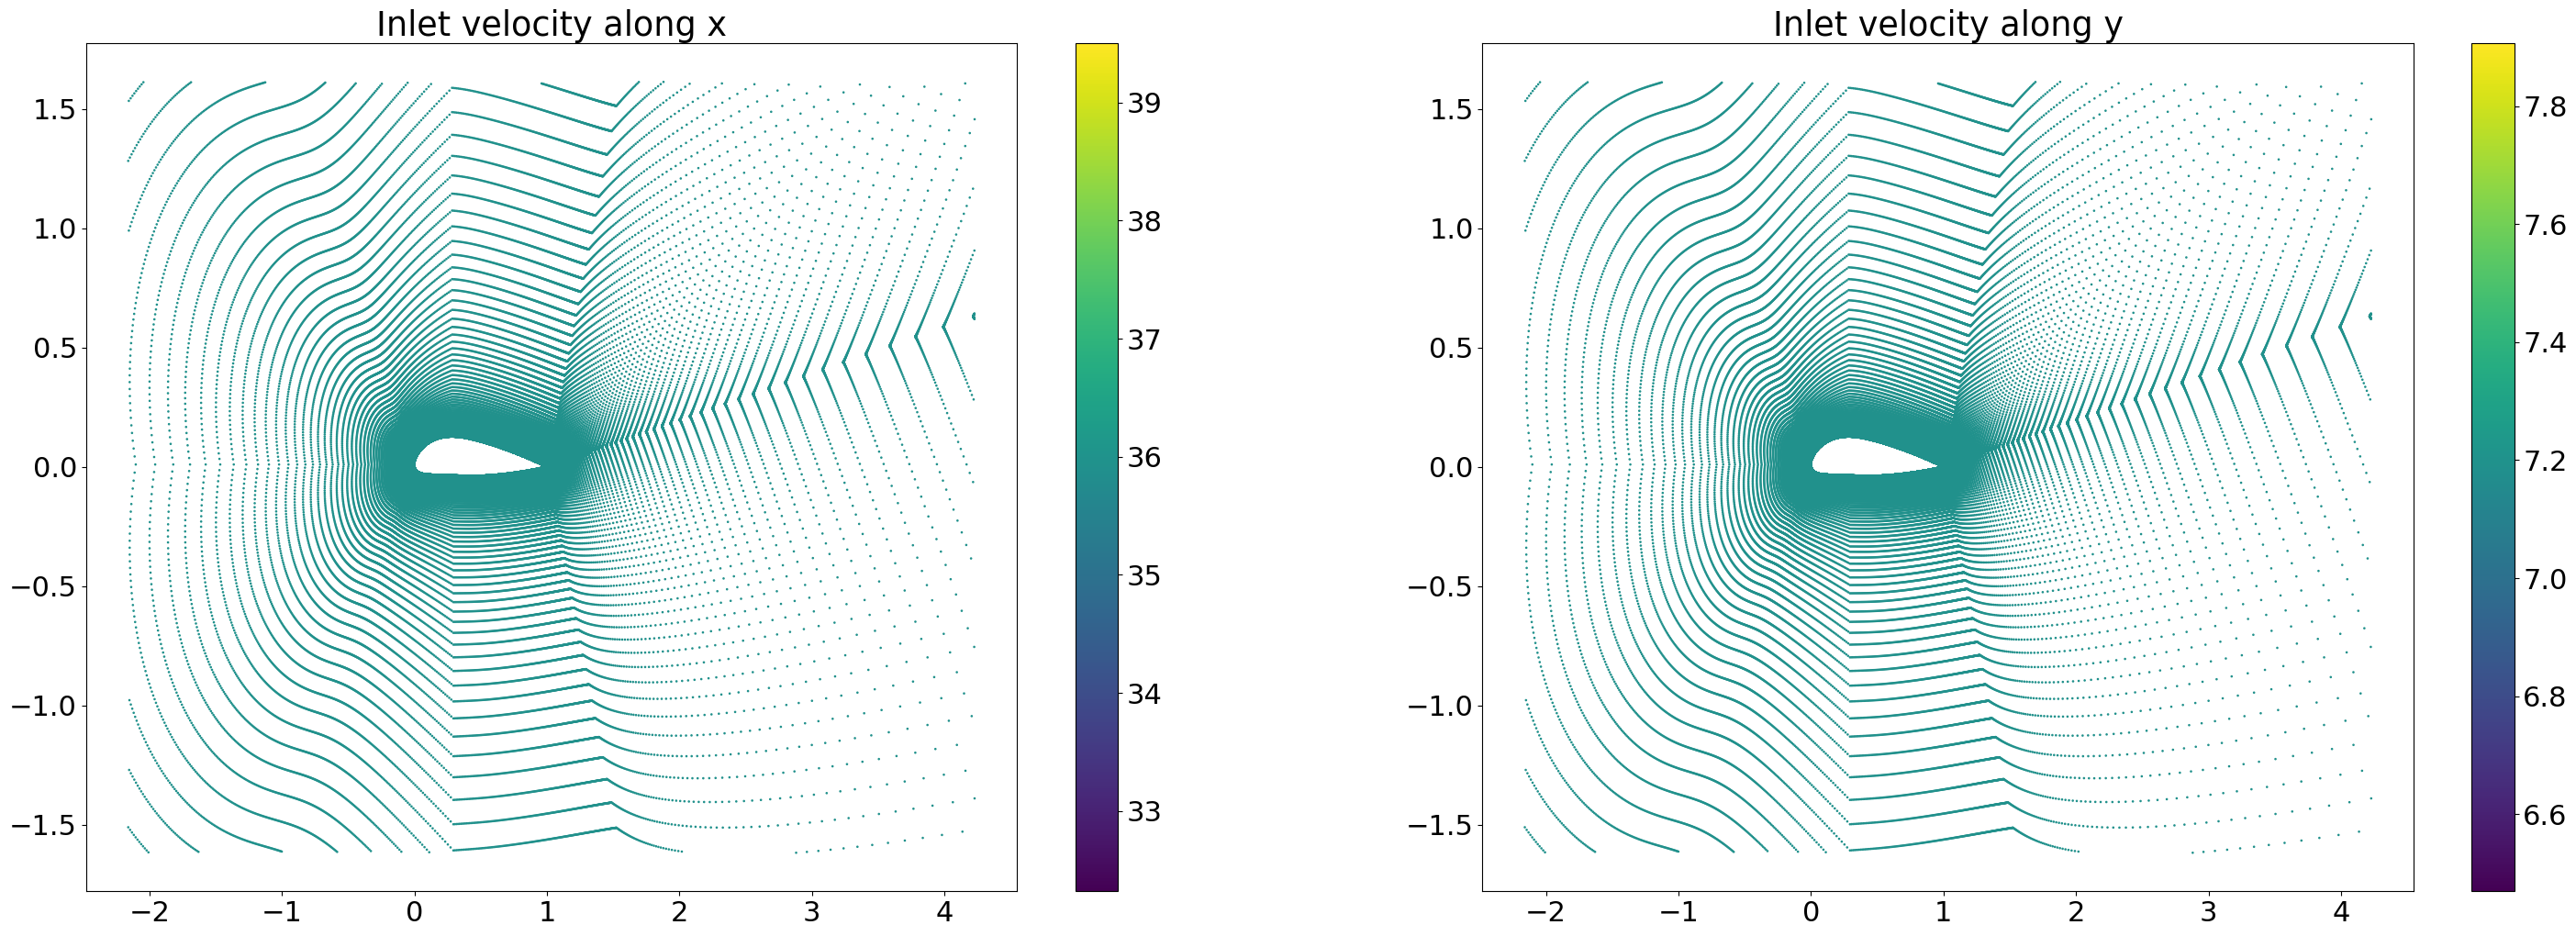

In [16]:
fig, ax = plt.subplots(1, 2, figsize = (36, 12))
sc0 = ax[0].scatter(first_simulation.position[:, 0], first_simulation.position[:, 1], c = first_simulation.input_velocity[:, 0], s = 0.75)
ax[0].title.set_text('Inlet velocity along x')
plt.colorbar(sc0)
sc1 = ax[1].scatter(first_simulation.position[:, 0], first_simulation.position[:, 1], c = first_simulation.input_velocity[:, 1], s = 0.75)
ax[1].title.set_text('Inlet velocity along y')
plt.colorbar(sc1)
plt.show()

### SDF - Signed Distance Function

This value represents the distance of the point relative to the airfoil surface: the closer the point is to the surface, the lower the value, with 0 meaning the point lies on the surface.

Axes represent the coordinates, and the color is the distance.

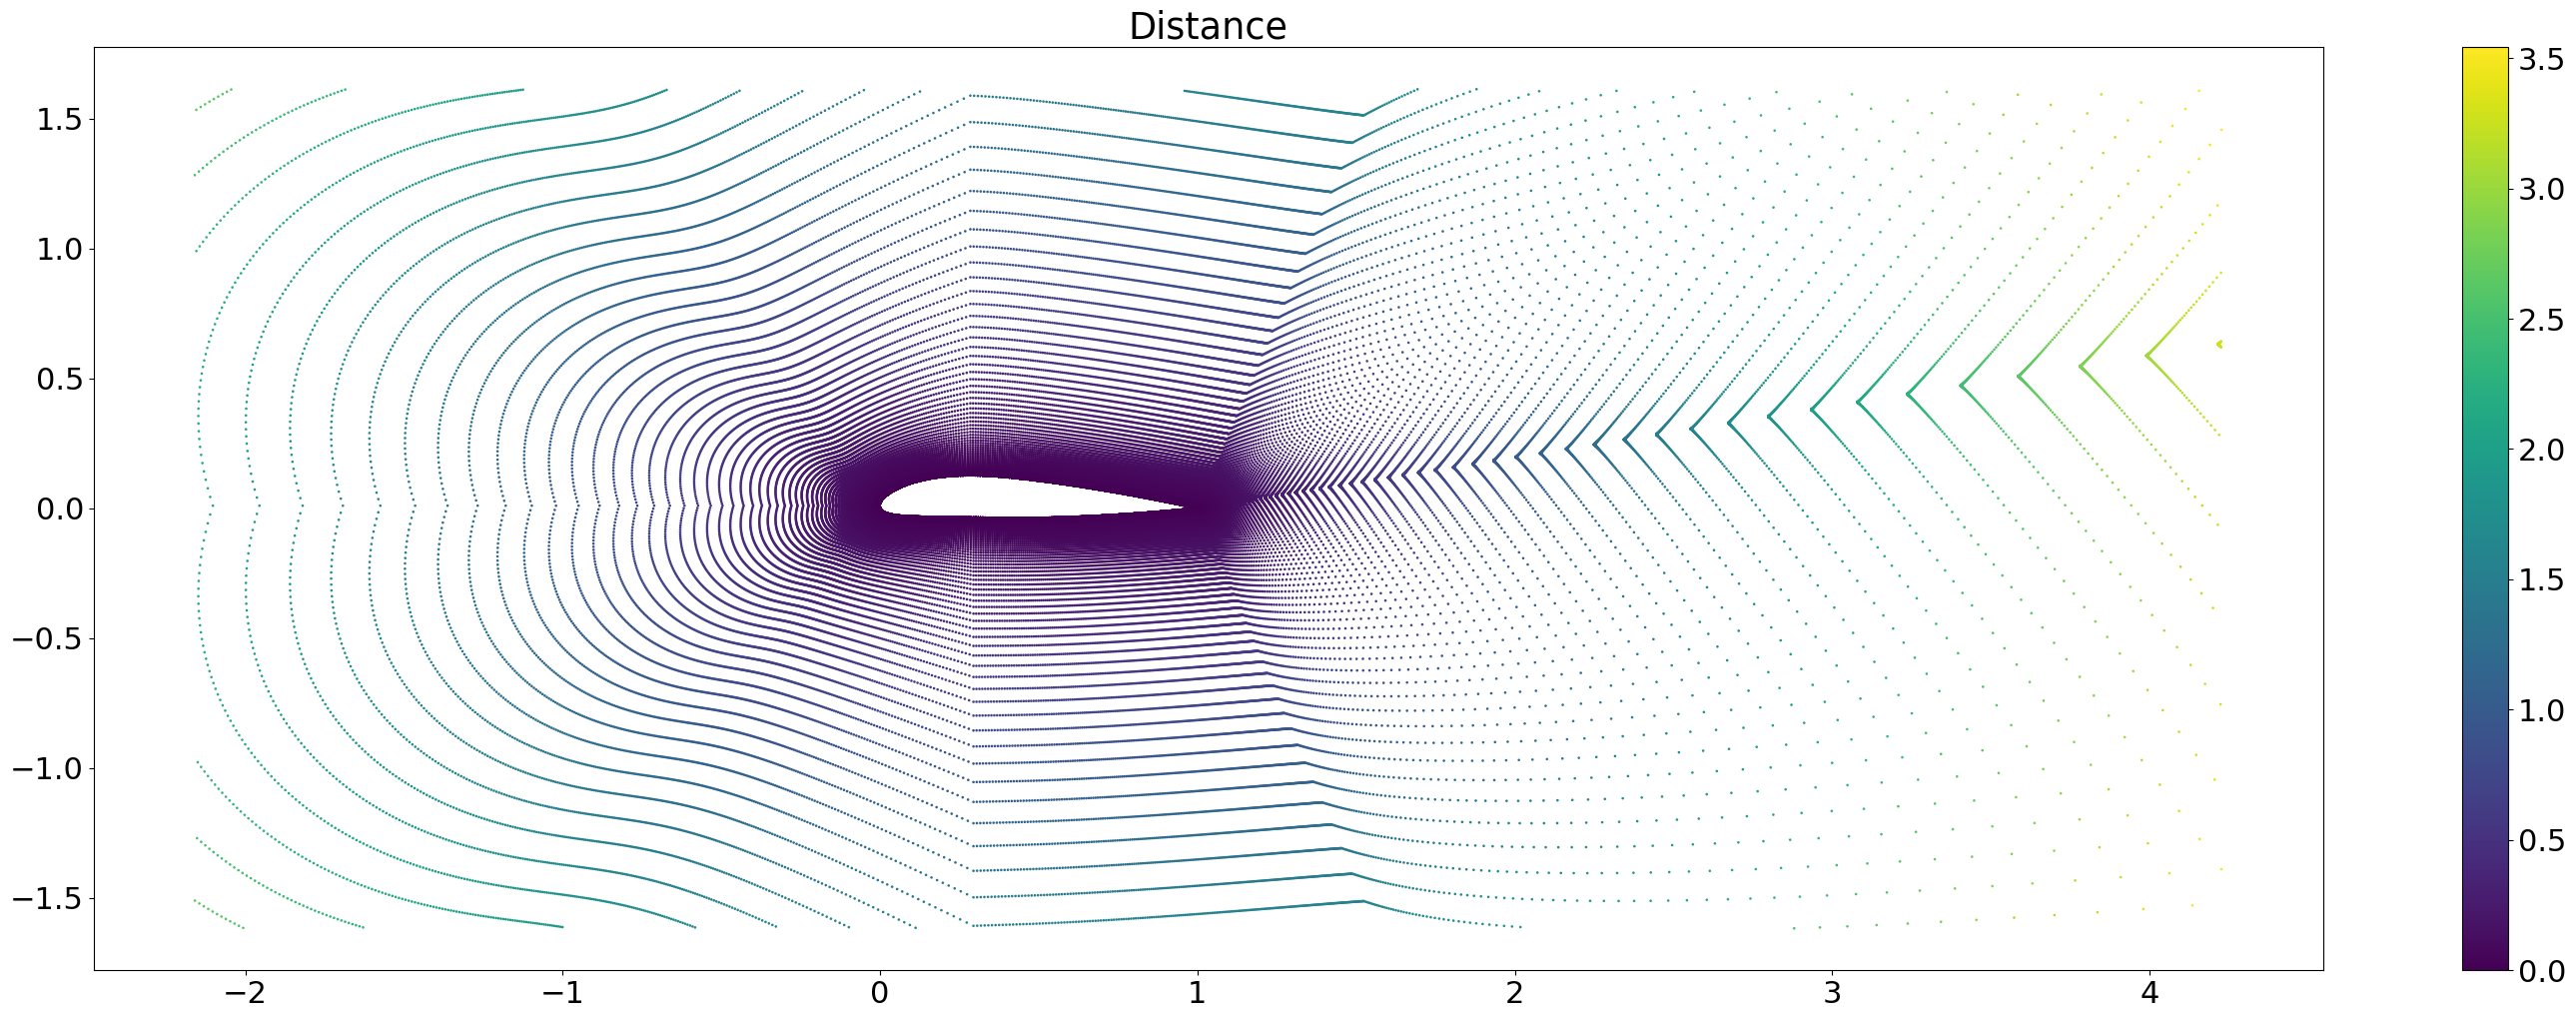

In [18]:
fig, ax = plt.subplots(1, 1, figsize = (36, 12))
sc = ax.scatter(first_simulation.position[:, 0], first_simulation.position[:, 1], c = first_simulation.sdf[:, 0], s = 0.75)
ax.title.set_text('Distance')
plt.colorbar(sc)
plt.show()

### Normals

This graph shows us the direction of the normals of the airfoil surface, essentially defining its shape.

We see the x and y component graph again. On the axes, we have x and y spatial coordinates. The color tells the x and y component of the inward-pointing normal vector at each spatial coordinate, thus defining the shape of the airfoil.

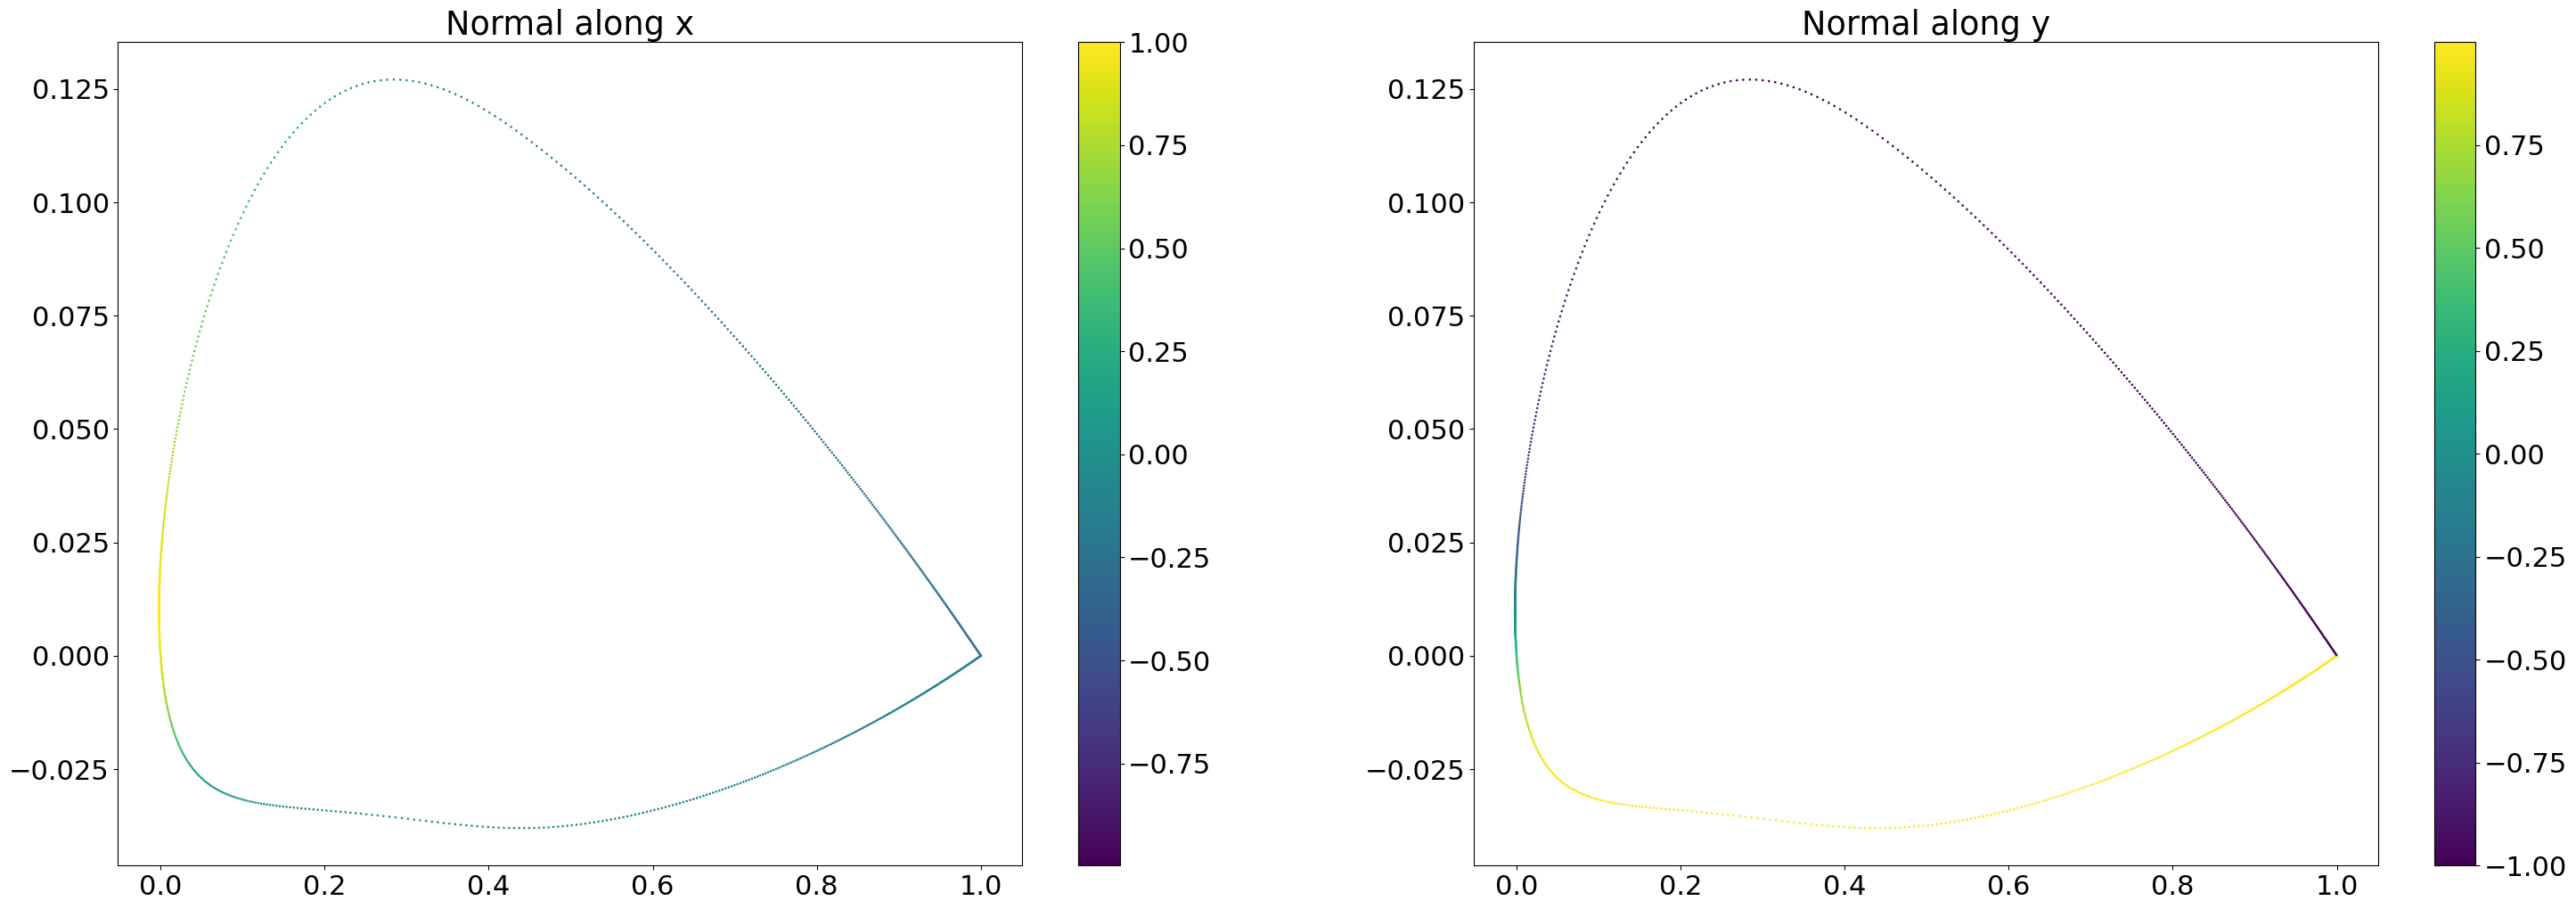

In [19]:
fig, ax = plt.subplots(1, 2, figsize = (36, 12))
sc0 = ax[0].scatter(first_simulation.airfoil_position[:, 0], first_simulation.airfoil_position[:, 1], c = first_simulation.airfoil_normals[:, 0], s = 0.75)
ax[0].title.set_text('Normal along x')
plt.colorbar(sc0)
sc1 = ax[1].scatter(first_simulation.airfoil_position[:, 0], first_simulation.airfoil_position[:, 1], c = first_simulation.airfoil_normals[:, 1], s = 0.75)
ax[1].title.set_text('Normal along y')
plt.colorbar(sc1)
plt.show()

### Output visualization

After we do all the computations and predictions, we will get our pressure, computed system velocity and viscosity (turbulence info).

Again the same, color = magnitude.

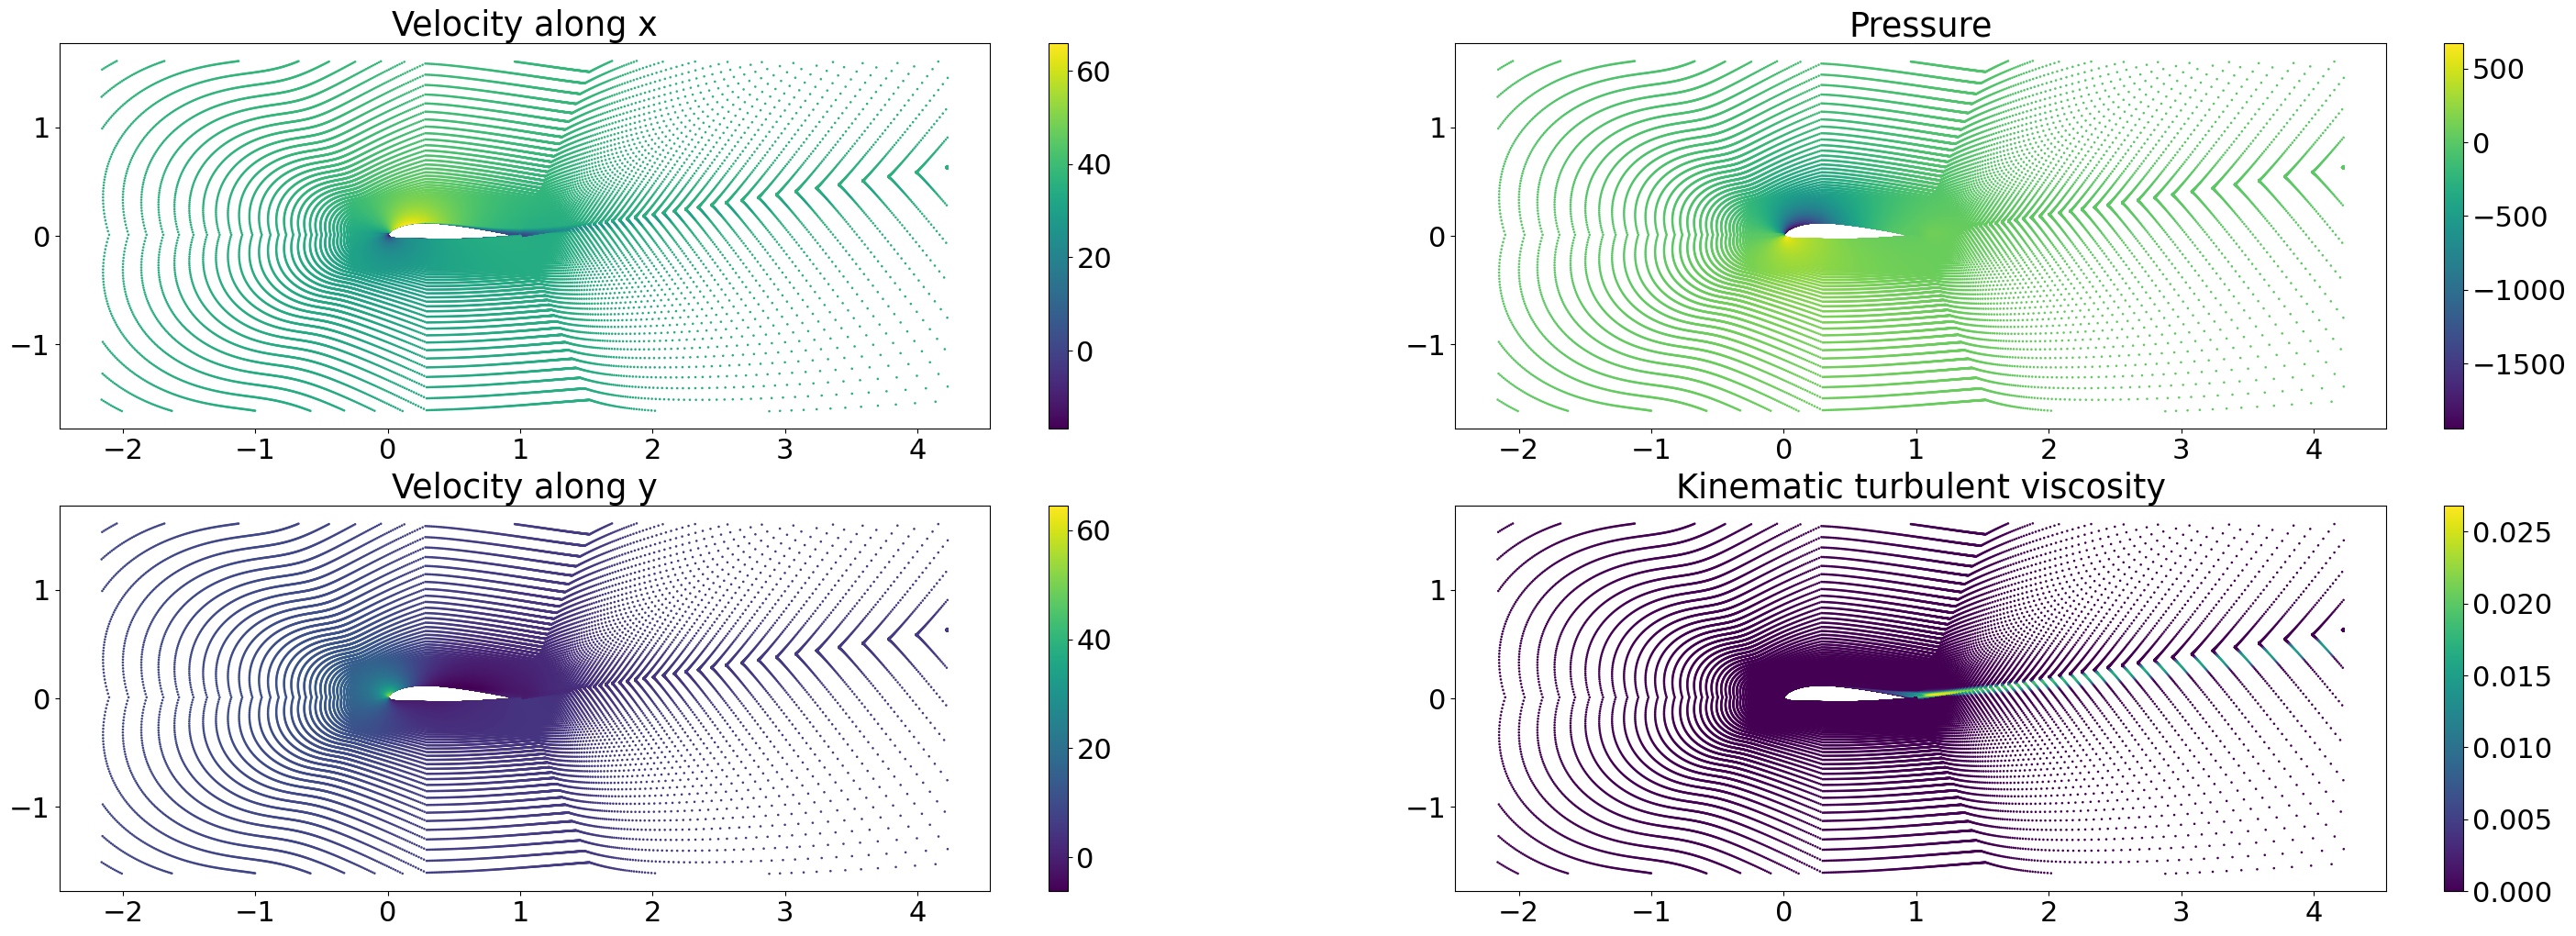

In [21]:
fig, ax = plt.subplots(2, 2, figsize = (36, 12))
sc0 = ax[0, 0].scatter(first_simulation.position[:, 0], first_simulation.position[:, 1], c = first_simulation.velocity[:, 0], s = 0.75)
ax[0, 0].title.set_text('Velocity along x')
plt.colorbar(sc0)
sc1 = ax[0, 1].scatter(first_simulation.position[:, 0], first_simulation.position[:, 1], c = first_simulation.pressure[:, 0], s = 0.75)
ax[0, 1].title.set_text('Pressure')
plt.colorbar(sc1)
sc2 = ax[1, 0].scatter(first_simulation.position[:, 0], first_simulation.position[:, 1], c = first_simulation.velocity[:, 1], s = 0.75)
ax[1, 0].title.set_text('Velocity along y')
plt.colorbar(sc2)
sc3 = ax[1, 1].scatter(first_simulation.position[:, 0], first_simulation.position[:, 1], c = first_simulation.nu_t[:, 0], s = 0.75)
ax[1, 1].title.set_text('Kinematic turbulent viscosity')
plt.colorbar(sc3)
plt.show()

Besides the shown atributes the class Simulation has more attribures and methods, shown in the class description in the $Simulation$ part.  
Also definitions of all functions could be found on the same link.

Text(0.5, 1.0, 'Surface mesh sampling')

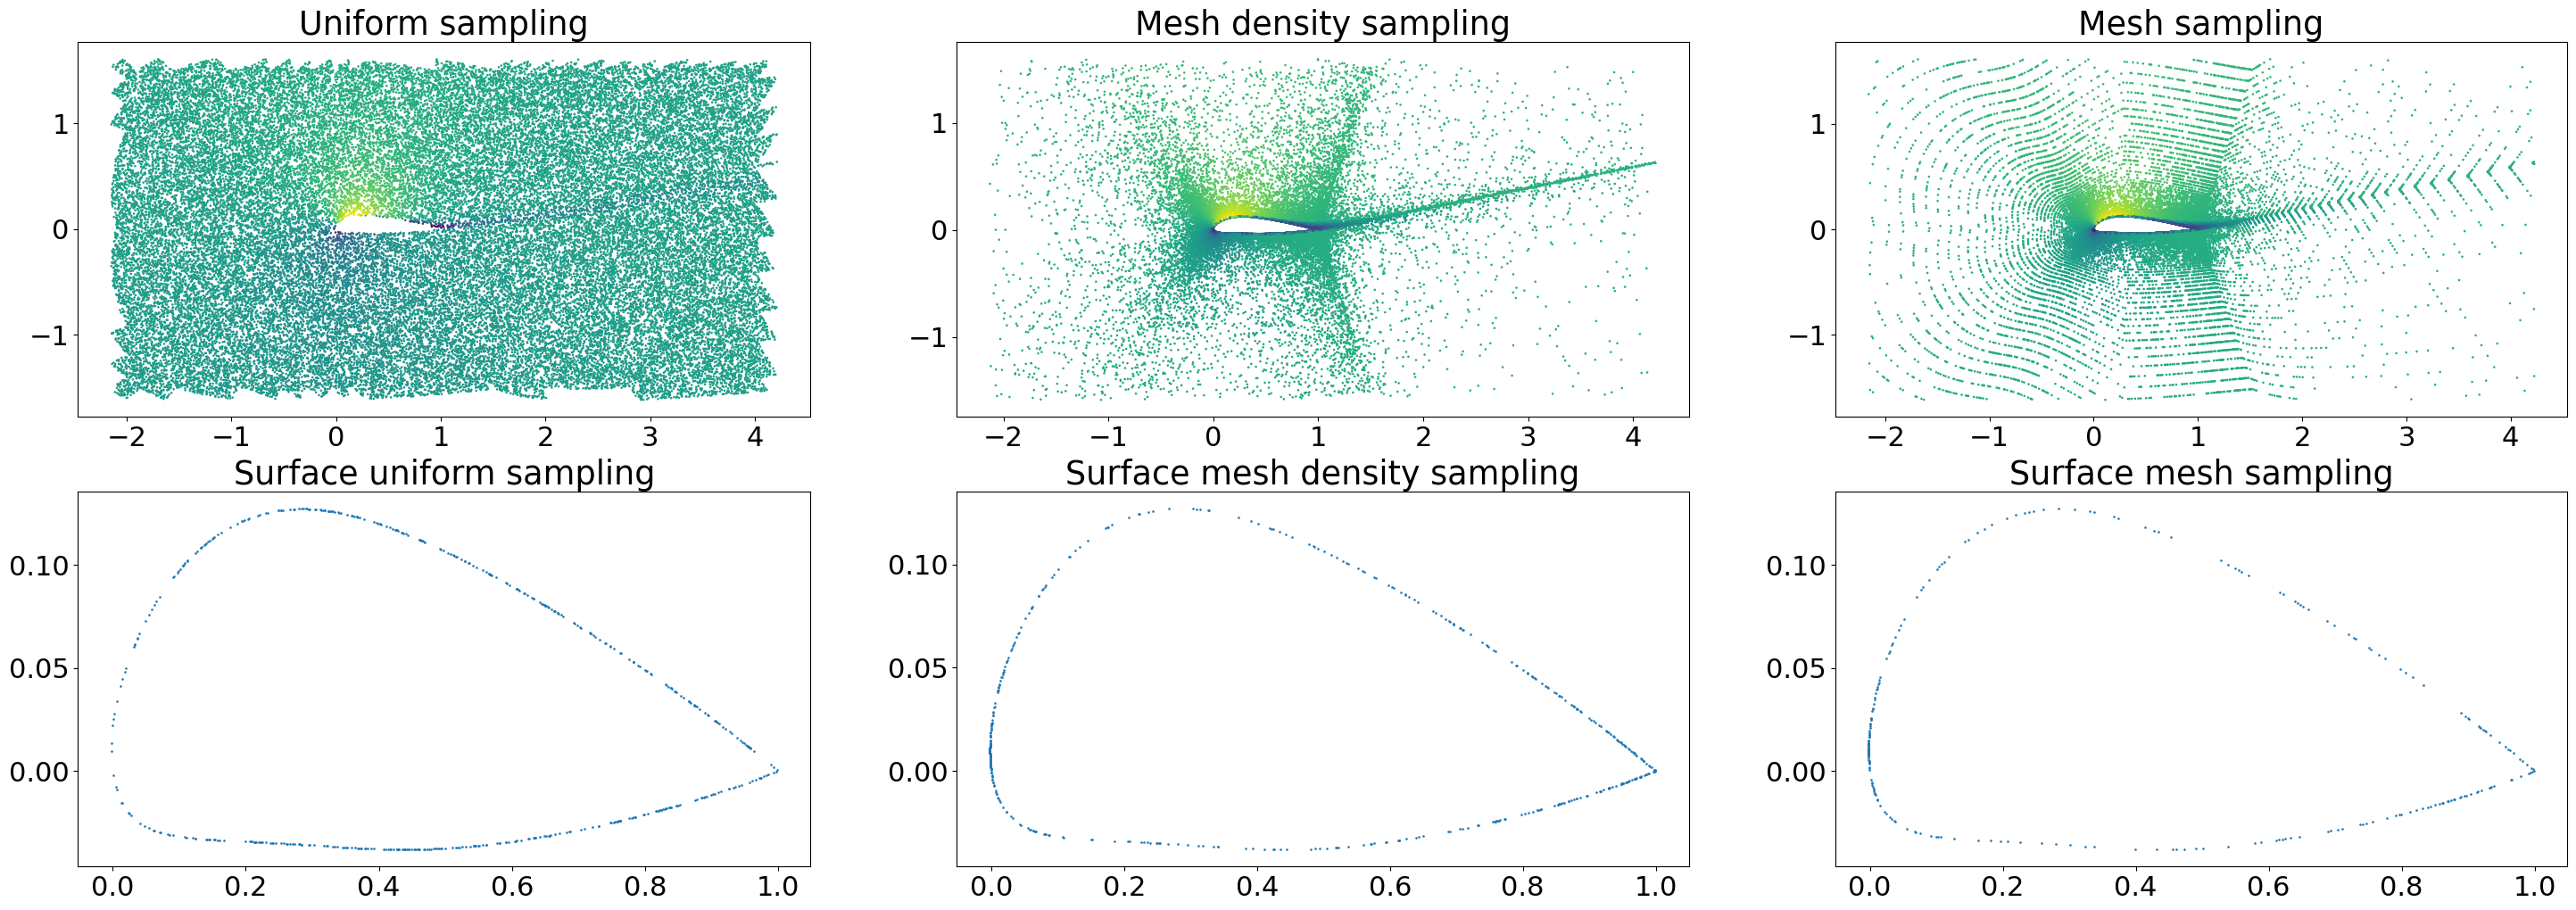

In [23]:
simulation = first_simulation
seed = 0

sampling_volume_uniform = simulation.sampling_volume(seed, 50000, density = 'uniform')
sampling_volume_mesh = simulation.sampling_volume(seed, 50000, density = 'mesh_density')

sampling_surface_uniform = simulation.sampling_surface(seed, 500, density = 'uniform')
sampling_surface_mesh = simulation.sampling_surface(seed, 500, density = 'mesh_density')

sampling_mesh = simulation.sampling_mesh(seed, 50000)
sampling_mesh_surface = sampling_mesh[sampling_mesh[:, 2].astype('bool')]

fig, ax = plt.subplots(2, 3, figsize = (36, 12))
ax[0, 0].scatter(sampling_volume_uniform[:, 0], sampling_volume_uniform[:, 1], c = sampling_volume_uniform[:, 3], s = 0.75)
ax[0, 0].set_title('Uniform sampling')
ax[0, 1].scatter(sampling_volume_mesh[:, 0], sampling_volume_mesh[:, 1], c = sampling_volume_mesh[:, 3], s = 0.75)
ax[0, 1].set_title('Mesh density sampling')
ax[0, 2].scatter(sampling_mesh[:, 0], sampling_mesh[:, 1], c = sampling_mesh[:, 8], s = 0.75)
ax[0, 2].set_title('Mesh sampling')
ax[1, 0].scatter(sampling_surface_uniform[:, 0], sampling_surface_uniform[:, 1], s = 0.75)
ax[1, 0].set_title('Surface uniform sampling')
ax[1, 1].scatter(sampling_surface_mesh[:, 0], sampling_surface_mesh[:, 1], s = 0.75)
ax[1, 1].set_title('Surface mesh density sampling')
ax[1, 2].scatter(sampling_mesh_surface[:, 0], sampling_mesh_surface[:, 1], s = 0.75)
ax[1, 2].set_title('Surface mesh sampling')

You can also directly compute the wall shear stress and the force coefficient with the class attributes or the reference simulation.  
EXPLAIN THIS A BIT MORE

In [24]:
simulation.velocity = np.zeros_like(simulation.velocity)
simulation.pressure = np.zeros_like(simulation.pressure)

print(simulation.force())

print(simulation.force(reference = True))

print(simulation.force_coefficient())

print(simulation.force_coefficient(reference = True))

(array([0., 0.]), array([-0., -0.]), array([0., 0.]))
(array([-198.5937911 , 1084.21102939]), array([-204.47910219, 1082.64495691]), array([5.88531109, 1.56607249]))
((np.float64(0.0), np.float64(0.0), np.float64(0.0)), (np.float64(0.0), np.float64(0.0), np.float64(0.0)))
((np.float64(0.02275834973573578), np.float64(0.015102459924614614), np.float64(0.007655889811121164)), (np.float64(1.3881648013726122), np.float64(1.3876855454563488), np.float64(0.0004792559162634872)))
